# 1. Introduction
    
### The goal of the project is to apply all of the studied algorithms in the Data Mining laboratories to a dataset. To achieve that i chose to analyse the news feed data from 50 different news sources.

# 2. Problem statement
   
### In the process of digitization the number of digital documents is constantly growing. Data mining is useful to extract only the relevant information from a big dataset in a timely manner.


# 3. Dataset description 

### To avoid creating a web scraper from scratch i used an external [API](https://newsapi.org) to collect the news data. Upon sending a get request to the api it returns a JSON file containing the latest 10 news articles and the news source. After that i store them in a dataframe and remove the duplicate articles and the ones with no description.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
#2d0535bc1c3c4a66907b3bf8962cd336
API_KEY = 'f5390c440d7443c78c669cddd6ccf7f8'
NEWS_API = 'https://newsapi.org/v1/sources?language=en'

response = requests.get(NEWS_API).json()

source_list = []
for source in response['sources']:
        source_list.append(source['id'])
source_list

category = {}
response = requests.get(NEWS_API)
response = response.json()
for s in response['sources']:
    category[s['id']] = s['category']
category

{'abc-news-au': 'general',
 'al-jazeera-english': 'general',
 'ars-technica': 'technology',
 'associated-press': 'general',
 'bbc-news': 'general',
 'bbc-sport': 'sports',
 'bloomberg': 'business',
 'breitbart-news': 'general',
 'business-insider': 'business',
 'business-insider-uk': 'business',
 'buzzfeed': 'entertainment',
 'cnn': 'general',
 'engadget': 'technology',
 'entertainment-weekly': 'entertainment',
 'espn': 'sports',
 'espn-cric-info': 'sports',
 'financial-times': 'business',
 'football-italia': 'sports',
 'fortune': 'business',
 'four-four-two': 'sports',
 'fox-sports': 'sports',
 'google-news': 'general',
 'hacker-news': 'technology',
 'ign': 'entertainment',
 'independent': 'general',
 'mashable': 'entertainment',
 'mtv-news': 'entertainment',
 'mtv-news-uk': 'entertainment',
 'national-geographic': 'science',
 'new-scientist': 'science',
 'newsweek': 'general',
 'new-york-magazine': 'general',
 'nfl-news': 'sports',
 'polygon': 'entertainment',
 'recode': 'technology'

In [2]:
URL = 'https://newsapi.org/v1/articles?source={0}&sortBy={1}&apiKey={2}'
    
responses = []
for source in source_list:
    try:
        u = URL.format(source,'popularity',API_KEY)
    except: 
        print(source, "error")
        continue
    
    response = requests.get(u)
    r = response.json()
    
    try:
        for article in r['articles']:
            article['source'] = source;
            responses.append(article);
    except:
        print(r['code'])
            
    print(source, u, " - done")
   

abc-news-au https://newsapi.org/v1/articles?source=abc-news-au&sortBy=popularity&apiKey=f5390c440d7443c78c669cddd6ccf7f8  - done
al-jazeera-english https://newsapi.org/v1/articles?source=al-jazeera-english&sortBy=popularity&apiKey=f5390c440d7443c78c669cddd6ccf7f8  - done
ars-technica https://newsapi.org/v1/articles?source=ars-technica&sortBy=popularity&apiKey=f5390c440d7443c78c669cddd6ccf7f8  - done
associated-press https://newsapi.org/v1/articles?source=associated-press&sortBy=popularity&apiKey=f5390c440d7443c78c669cddd6ccf7f8  - done
bbc-news https://newsapi.org/v1/articles?source=bbc-news&sortBy=popularity&apiKey=f5390c440d7443c78c669cddd6ccf7f8  - done
bbc-sport https://newsapi.org/v1/articles?source=bbc-sport&sortBy=popularity&apiKey=f5390c440d7443c78c669cddd6ccf7f8  - done
bloomberg https://newsapi.org/v1/articles?source=bloomberg&sortBy=popularity&apiKey=f5390c440d7443c78c669cddd6ccf7f8  - done
breitbart-news https://newsapi.org/v1/articles?source=breitbart-news&sortBy=popularit

<AxesSubplot:>

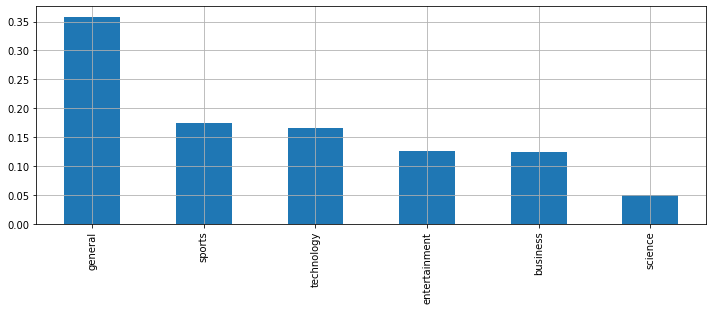

In [3]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import numpy as np

def addType(source):
    return category[source]

news = pd.DataFrame(responses)
news = news.drop_duplicates()
news = news.dropna(subset=['description'])
#news.drop(['urlToImage'], inplace=True, axis=1)

news['category'] = news['source'].map(lambda s: addType(s))

news = news[news.description.map(len) >= 50]

news = news.reset_index()
news = news.drop(columns='index')

news.category.value_counts(normalize=True).plot(kind='bar', grid=True, figsize=(12, 4))

In [155]:
news

,author,title,description,url,urlToImage,publishedAt,source,category,tokens,tokens_w_bigrams
0,"Natarsha Kallios, Rebecca Opie",SA Chief Public Health Officer Nicola Spurrier...,South Australia's Chief Public Health Officer ...,http://www.abc.net.au/news/2021-05-31/spurrier...,https://live-production.wcms.abc-cdn.net.au/76...,2021-05-31T10:53:11Z,abc-news-au,general,"[mittee, criminalisation, sex, work, created, ...","[mittee, criminalisation, sex, work, created, ..."
1,ABC News,Vietnam's Ho Chi Minh City to test entire popu...,Ho Chi Minh City aims to test its entire popul...,http://www.abc.net.au/news/2021-05-31/vietnam-...,https://live-production.wcms.abc-cdn.net.au/5e...,2021-05-31T09:36:57Z,abc-news-au,general,"[ho, chi, minh, city, aims, test, entire, popu...","[ho, chi, minh, city, aims, test, entire, popu..."
2,"Phoebe Hosier, Emily Baker",Mandatory COVID-19 vaccination of aged care wo...,The medical experts helping guide Australia's ...,http://www.abc.net.au/news/2021-05-31/vic-covi...,https://live-production.wcms.abc-cdn.net.au/7f...,2021-05-31T08:31:10Z,abc-news-au,general,"[medical, experts, helping, guide, australia, ...","[medical, experts, helping, guide, australia, ..."
3,ABC News,NT introduces 'day 17 test' for COVID to preve...,Victoria's coronavirus outbreak and repeated b...,http://www.abc.net.au/news/2021-05-31/nt-new-c...,https://live-production.wcms.abc-cdn.net.au/4d...,2021-05-31T08:20:08Z,abc-news-au,general,"[plete, quarantine, interstate]","[plete, quarantine, interstate]"
4,Rachel Riga,Queensland MPs to receive three pay rises in n...,Queensland politicians will pocket three pay r...,http://www.abc.net.au/news/2021-05-31/qld-poli...,https://www.abc.net.au/news/linkableblob/84136...,2021-05-31T07:44:20Z,abc-news-au,general,"[parable, jurisdictions]","[parable, jurisdictions]"
...,...,...,...,...,...,...,...,...,...,...
397,None,Destroying 'Black Wall Street': An illustrated...,What started with an allegation ended with an ...,https://www.usatoday.com/in-depth/news/nation/...,https://www.gannett-cdn.com/presto/2021/05/25/...,2021-05-28T09:30:04+00:00,usa-today,general,"[munity, illustrated, history, tulsa, race, ma...","[munity, illustrated, history, tulsa_race, mas..."
398,None,Vaccines 2.0: Next generation COVID shots will...,Drug companies are working to improve COVID-19...,https://www.usatoday.com/story/news/health/202...,https://www.gannett-cdn.com/presto/2021/05/28/...,2021-05-31T09:30:07+00:00,usa-today,general,"[panies, working, improve, covid, vaccines, fi...","[panies, working, improve, covid, vaccines, fi..."
399,None,Human remains found after plane crashes into T...,Diet guru Gwen Lara and her husband were among...,https://www.usatoday.com/story/news/nation/202...,https://www.gannett-cdn.com/presto/2021/05/29/...,2021-05-31T02:15:49+00:00,usa-today,general,"[diet, guru, gwen, lara, husband, people, aboa...","[diet_guru, gwen, lara, husband, people, aboar..."
400,None,"Memorial Day sales 2021: Home Depot, Lowe's, T...",Shoppers wanting to hit up Memorial Day sales ...,https://www.usatoday.com/story/money/shopping/...,https://www.gannett-cdn.com/presto/2019/03/20/...,2021-05-31T04:01:10+00:00,usa-today,general,"[shoppers, wanting, hit, memorial, day, sales,...","[shoppers, wanting, hit, memorial_day, sales, ..."


# 4. Data cleaning

### For cleaning the data i used the custom stop-words presented in the laboratory appended with the punctuation signs and the stop-words provided by the [Natural Language Toolkit](https://www.nltk.org). Before applying the stop-words filter i use the lower() method to make all the characters lowercase and remove all numbers and the contractions from the texts before tokenizing the description from the dataframe.

In [133]:
from nltk.corpus import stopwords
from string import punctuation
from tidytext import *
from siuba import *

stop_words = []
punctuation_signs = ['','"','<','>','-','--','—','–','_','`',"'",'``','\'', '"', ',', ",", '.', '..', '...', '!', '?', '/', '[', ']', '(', ')', '“', '”', '’', '‘',':', ';', '&', '``', "''",'|','$','%','*','#',"#",'@','!','&','(',')','em','/em']
custom_stop_words = ['a','the','rsquo','lsquo','to',"a","al","about","above","after","again","against","ain","all","am","an","and","any","are","aren","aren't","as","at","be","because","been","before","being","below","between","both","but","by","can","couldn","couldn't","d","did","didn","didn't","do","does","doesn","doesn't","doing","don","don't","down","during","each","few","for","from","further","had","hadn","hadn't","has","hasn","hasn't","have","haven","haven't","having","he","her","here","hers","herself","him","himself","his","how","i","if","in","into","is","isn","isn't","it","it's","its","itself","just","ll","m","ma","me","mightn","mightn't","more","most","mustn","mustn't","my","myself","needn","needn't","no","nor","not","now","o","of","off","on","once","only","or","other","our","ours","ourselves","out","over","own","re","s","same","shan","shan't","she","she's","should","should've","shouldn","shouldn't","so","some","such","t","than","that","that'll","the","their","theirs","them","themselves","then","there","these","they","this","those","through","to","too","under","until","up","ve","very","was","wasn","wasn't","we","were","weren","weren't","what",'what',"when","where","which","while","who","whom","why","will","with",'with',"won","won't","wouldn","wouldn't","y","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","could","he'd","he'll","he's","here's","how's","i'd","i'll","i'm","i've","let's","ought","she'd","she'll","that's","there's","they'd","they'll","they're","they've","we'd","we'll","we're","we've","what's","when's","where's","who's","why's","would","able","abst","accordance","according","accordingly","across","act","actually","added","adj","affected","affecting","affects","afterwards","ah","almost","alone","along","already","also","although","always","among","amongst","announce","another","anybody","anyhow","anymore","anyone","anything","anyway","anyways","anywhere","apparently","approximately","arent","arise","around","aside","ask","asking","auth","available","away","awfully","b","back","became","become","becomes","becoming","beforehand","begin","beginning","beginnings","begins","behind","believe","beside","besides","beyond","biol","brief","briefly","c","ca","came","cannot","can't","cause","causes","certain","certainly","co","com","come","comes","contain","containing","contains","couldnt","date","different","done","downwards","due","e","ed","edu","effect","eg","eight","eighty","either","else","elsewhere","end","ending","enough","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","except","f","far","ff","fifth","first","five","fix","followed","following","follows","former","formerly","forth","found","four","furthermore","g","gave","get","gets","getting","give","given","gives","giving","go","goes","gone","got","gotten","h","happens","hardly","hed","hence","hereafter","hereby","herein","heres","hereupon","hes","hi","hid","hither","home","howbeit","however","hundred","id","ie","im","immediate","immediately","importance","important","inc","indeed","index","information","instead","invention","inward","itd","it'll","j","k","keep","keeps","kept","kg","km","know","known","knows","l","largely","last","lately","later","latter","latterly","least","less","lest","let","lets","like","liked","likely","line","little","'ll","look","looking","looks","ltd","made","mainly","make","makes","many","may","maybe","mean","means","meantime","meanwhile","merely","mg","might","million","miss","ml","moreover","mostly","mr","mrs","much","mug","must","n","na","name","namely","nay","nd","near","nearly","necessarily","necessary","need","needs","neither","never","nevertheless","new","next","nine","ninety","nobody","non","none","nonetheless","noone","normally","nos","noted","nothing","nowhere","obtain","obtained","obviously","often","oh","ok","okay","old","omitted","one","ones","onto","ord","others","otherwise","outside","overall","owing","p","page","pages","part","particular","particularly","past","per","perhaps","placed","please","plus","poorly","possible","possibly","potentially","pp","predominantly","present","previously","primarily","probably","promptly","proud","provides","put","q","que","quickly","quite","qv","r","ran","rather","rd","readily","really","recent","recently","ref","refs","regarding","regardless","regards","related","relatively","research","respectively","resulted","resulting","results","right","run","said","saw","say","saying","says","sec","section","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sent","seven","several","shall","shed","shes","show","showed","shown","showns","shows","significant","significantly","similar","similarly","since","six","slightly","somebody","somehow","someone","somethan","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specifically","specified","specify","specifying","still","stop","strongly","sub","substantially","successfully","sufficiently","suggest","sup","sure","take","taken","taking","tell","tends","th","thank","thanks","thanx","thats","that've","thence","thereafter","thereby","thered","therefore","therein","there'll","thereof","therere","theres","thereto","thereupon","there've","theyd","theyre","think","thou","though","thoughh","thousand","throug","throughout","thru","thus","til","tip","together","took","toward","towards","tried","tries","truly","try","trying","ts","twice","two","u","un","unfortunately","unless","unlike","unlikely","unto","upon","ups","us","use","used","useful","usefully","usefulness","uses","using","usually","v","value","various","'ve","via","viz","vol","vols","vs","w","want","wants","wasnt","way","wed","welcome","went","werent","whatever","what'll","whats","whence","whenever","whereafter","whereas","whereby","wherein","wheres","whereupon","wherever","whether","whim","whither","whod","whoever","whole","who'll","whomever","whos","whose","widely","willing","wish","within","without","wont","words","world","wouldnt","www","x","yes","yet","youd","youre","z","zero","a's","ain't","allow","allows","apart","appear","appreciate","appropriate","associated","best","better","c'mon","c's","cant","changes","clearly","concerning","consequently","consider","considering","corresponding","course","currently","definitely","described","despite","entirely","exactly","example","going","greetings","hello","help","hopefully","ignored","inasmuch","indicate","indicated","indicates","inner","insofar","it'd","keep","keeps","novel","presumably","reasonably","second","secondly","sensible","serious","seriously","sure","t's","third","thorough","thoroughly","three","well","wonder","of","000","mon","moday","tuesday","wednesday","thursday","friday","saturday","sunday"]
stop_words.extend(punctuation_signs)
stop_words.extend(custom_stop_words)
stop_words.extend(stopwords.words('english'))
len(stop_words)

1029

In [134]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w+]\d+', '', text)
    text = re.sub(r'(^.*com)', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r"\'s", " is ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = text.strip()
    return text

def tokenizer(text):
    text = clean_text(text)    
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if not word in stop_words]
    return tokens

news['description'] = news['description'].map(lambda d: str(d))
news['tokens'] = news['description'].map(lambda d: tokenizer(d))
news['tokens']

0      [mittee, criminalisation, sex, work, created, ...
1      [ho, chi, minh, city, aims, test, entire, popu...
2      [medical, experts, helping, guide, australia, ...
3                        [plete, quarantine, interstate]
4                               [parable, jurisdictions]
                             ...                        
397    [munity, illustrated, history, tulsa, race, ma...
398    [panies, working, improve, covid, vaccines, fi...
399    [diet, guru, gwen, lara, husband, people, aboa...
400    [shoppers, wanting, hit, memorial, day, sales,...
401    [giant, tire, flew, sky, daly, moments, finish...
Name: tokens, Length: 402, dtype: object

# 5. Analyzing word and document frequency

### An approach for analyzing the importance of a word in the collection of the news is to calculate the tf-idf. 
### Tf-idf is intended to measure how important a word in the collection of the articles. To obtain the tf-idf i use [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) from sklearn on the words that have a document frequency strictly lower than 2

top 10 keywords [('people', 22), ('news', 22), ('covid', 21), ('day', 21), ('texas', 17), ('president', 14), ('coronavirus', 13), ('years', 11), ('state', 11), ('republicans', 11)]


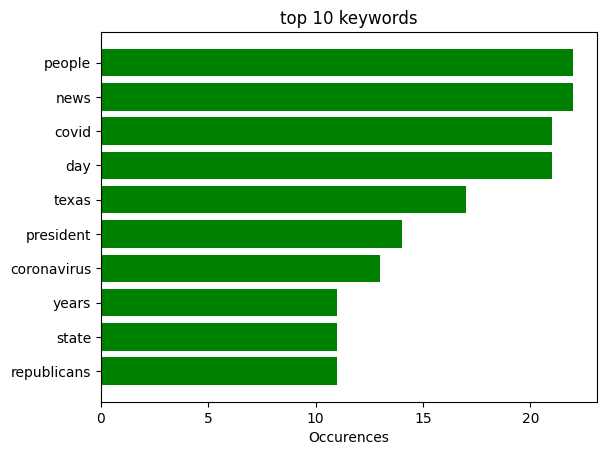

In [135]:
import matplotlib.pyplot as plt
from plotnine import ggplot
from collections import Counter 

alltokens = []
def keywords(tokens):
    for i in range(len(tokens)):
        try:
            for token in tokens[i]:
                alltokens.append(token)
        except: 
            continue
    counter = Counter(alltokens)
    return counter.most_common(10)
most_used_words = keywords(news['tokens'])
length = len(most_used_words)
title = 'top ' + str(length) + ' keywords'
print(title, most_used_words)

arr1 = []
arr2 = []
for i in range(0,length):
    arr1.append(most_used_words[i][0])
    arr2.append(most_used_words[i][1])

plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = np.arange(length)

ax.barh(y_pos, arr2, align='center',
        color='green', ecolor='none')
ax.set_yticks(y_pos)
ax.set_yticklabels(arr1)
ax.invert_yaxis()
ax.set_xlabel('Occurences')
ax.set_title(title)

plt.show()

In [136]:
from sklearn.feature_extraction.text import TfidfVectorizer

alltokens_df = pd.DataFrame(alltokens)
alltokens_df.columns= ['word']
alltokens_df = count(alltokens_df, _.word, sort=True)

vectorizer = TfidfVectorizer(min_df=2, analyzer='word', ngram_range=(1, 1), stop_words=stop_words)
vz = vectorizer.fit_transform(alltokens_df['word'])

tf_idf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
tf_idf = pd.DataFrame().from_dict(dict(tf_idf), orient='index')

tf_idf = tf_idf.reset_index()
tf_idf.columns = ['word','tf_idf']

ordered_tf_idf = arrange(tf_idf, -_.tf_idf)
ordered_tf_idf = ordered_tf_idf.reset_index()
ordered_tf_idf = ordered_tf_idf.drop(columns=['index'])

ordered_tf_idf['tf_idf'] = ordered_tf_idf['tf_idf']/ordered_tf_idf['tf_idf'][0]
ordered_tf_idf

,word,tf_idf
0,board,1.000000
1,border,1.000000
2,call,1.000000
3,charging,1.000000
4,cities,1.000000
5,class,1.000000
6,creating,1.000000
7,cross,1.000000
8,delivery,1.000000
9,disney,1.000000


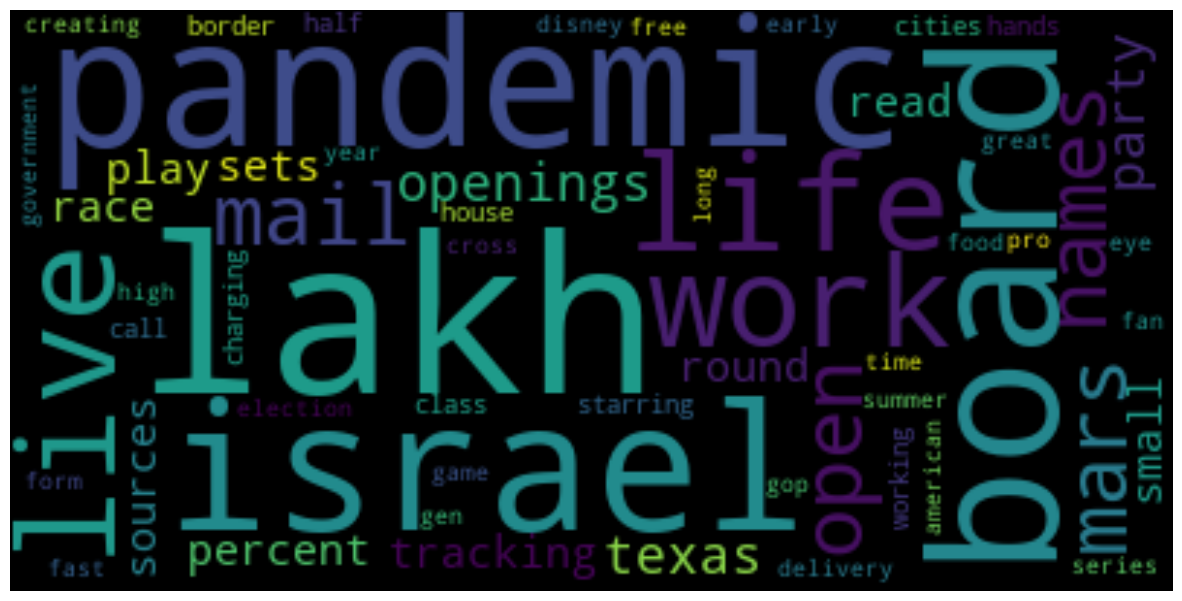

In [137]:
from wordcloud import WordCloud
    
def plot_word_cloud(terms):
    words = terms.word
    words = ' '.join(list(words))
    wordcloud = WordCloud(max_font_size=75).generate(words)
    plt.figure(figsize=(15, 15))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
plot_word_cloud(tf_idf.sort_values(by=['tf_idf'], ascending=False))

# 6. Relationship between words (N-grams)

### Similar to the single word tf-idf but now using [bind_tf_idf function](https://www.rdocumentation.org/packages/tidytext/versions/0.3.1/topics/bind_tf_idf) from tidytext and plot the 

In [138]:
from nltk import * 
bigrams_df = pd.DataFrame()
for i in range(0,len(news['description'])):
    try:
        bigrams_generator = ngrams(word_tokenize(news['description'][i]), 2)
        bigrams = [ ' '.join(grams) for grams in bigrams_generator]
        bigrams_df = bigrams_df.append(pd.DataFrame({
                "source": news['source'][i],
                "bigrams": bigrams,
            }))
        bigrams_df = bigrams_df.reset_index(drop=True)
    except: 
        continue

bigrams_df = count(bigrams_df, _.source, _.bigrams, sort=True)

bigrams_df[['word1', 'word2']] = bigrams_df['bigrams'].str.split(expand=True)   

bigrams_df['word1'] = bigrams_df['word1'].map(lambda d: clean_text(d))
bigrams_df['word2'] = bigrams_df['word2'].map(lambda d: clean_text(d)) 
bigrams_df_clean = bigrams_df[~bigrams_df.word1.isin(stop_words)] #clean word1
bigrams_df_clean = bigrams_df_clean[~bigrams_df_clean.word2.isin(stop_words)] #clean word2 

bigrams_df_clean =bigrams_df_clean.reset_index(drop=True)
 
#bigrams_df_clean = bigrams_df_clean.drop(columns=['level_0', 'index'])
bigrams_df_clean

,source,bigrams,n,word1,word2
0,reuters,President Donald,6,president,donald
1,reuters,Donald Trump,6,donald,trump
2,the-times-of-india,India News,5,india,news
3,reuters,U.S. Supreme,3,u.s.,supreme
4,reuters,United States,3,united,states
...,...,...,...,...,...
1857,espn-cric-info,pining Ravi,1,pining,ravi
1858,espn-cric-info,player database,1,player,database
1859,espn-cric-info,lbw calls,1,lbw,calls
1860,espn-cric-info,form abroad,1,form,abroad


In [139]:
bigrams_freq = count(bigrams_df_clean, _.bigrams, _.word1, _.word2, sort=True)

bigrams_tf_idf = bind_tf_idf(bigrams_freq, 'bigrams', 'word1',  'n')
bigrams_tf_idf = arrange(bigrams_tf_idf, -_.tf_idf)

bigrams_tf_idf = bigrams_tf_idf.reset_index()
bigrams_tf_idf = bigrams_tf_idf.drop(columns=['index','tf','idf'])

bigrams_tf_idf['tf_idf'] = bigrams_tf_idf['tf_idf']/bigrams_tf_idf['tf_idf'][0]
bigrams_tf_idf

,bigrams,word1,word2,n,tf_idf
0,Memorial Day,memorial,day,10,1.000000
1,French Open,french,open,3,1.000000
2,Zinedine Zidane,zinedine,zidane,3,1.000000
3,QAnon conference,qanon,conference,3,1.000000
4,Donald Trump,donald,trump,3,1.000000
...,...,...,...,...,...
1747,Covid-19 wave,covid,wave,1,0.083333
1748,Covid-19 pandemic,covid,pandemic,1,0.083333
1749,Covid-19 cases,covid,cases,1,0.083333
1750,Covid escaped,covid,escaped,1,0.083333


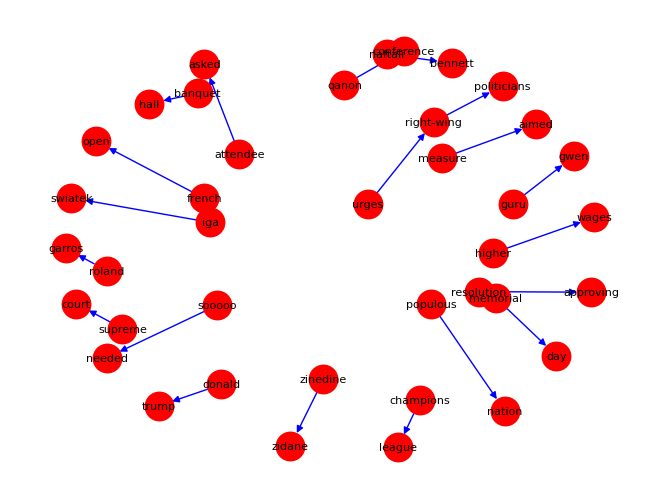

In [140]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.from_pandas_edgelist(df=bigrams_tf_idf.head(20), source='word1', target='word2', edge_attr='n', create_using=nx.DiGraph())

nx.draw(G, pos=nx.spring_layout(G, k=1.45, iterations=220), node_size=420, font_size=8, node_color='r', edge_color='b', with_labels=True)

plt.show()

# Topic modelling

### Considering we are looking at news articles we would like to classify them. For this i will use [Latent Dirichlet Allocation](https://radimrehurek.com/gensim/models/ldamodel.html) (LDA). 
### We will start by using gensim's [Phrases](https://radimrehurek.com/gensim/models/phrases.html) to find common bigrams and store them as a single token.
### After that we construct word<->id mappings using [Dictionary](https://radimrehurek.com/gensim/corpora/dictionary.html) and then   bag-of-words
### Finally we construct the LDA models and choose the best one. 

In [141]:
warnings.filterwarnings(action='ignore', module='gensim')
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel

In [142]:
bigram = gensim.models.Phrases(news['tokens'], min_count=1, threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)
news['tokens_w_bigrams'] = news['tokens'].map(lambda tokens: bigram_mod[tokens])

id2word = corpora.Dictionary(news['tokens_w_bigrams'])
texts = news['tokens_w_bigrams'].values

gensim_dictionary = corpora.Dictionary(texts)
gensim_corpus = [gensim_dictionary.doc2bow(token, allow_update=True) for token in texts]

In [148]:
max_models = 5
coherence_scores = []
models = []
for num_topics in range(2,max_models + 2):
    LDA_model = gensim.models.ldamulticore.LdaMulticore(gensim_corpus,
                                               id2word=id2word,
                                               #random_state=100,
                                               num_topics=num_topics, 
                                               passes=1,
                                            )
    models.append(LDA_model)
    coherence_model = CoherenceModel(model=LDA_model, texts=texts, dictionary=gensim_dictionary, coherence='c_v')
    coherence_scores.append(coherence_model.get_coherence())
    print("Finished for num_topics:",num_topics)
    print('Perplexity Score: ', LDA_model.log_perplexity(gensim_corpus))
    print('Coherence Score:', coherence_scores[num_topics-2])


Finished for num_topics: 2
Perplexity Score:  -8.416360113765741
Coherence Score: 0.704647433472436
Finished for num_topics: 3
Perplexity Score:  -8.491987340561312
Coherence Score: 0.6890959706649685
Finished for num_topics: 4
Perplexity Score:  -8.588317994487765
Coherence Score: 0.6973193558462583
Finished for num_topics: 5
Perplexity Score:  -8.59974234844068
Coherence Score: 0.645795498509558
Finished for num_topics: 6
Perplexity Score:  -8.65345936411415
Coherence Score: 0.6697734698398731


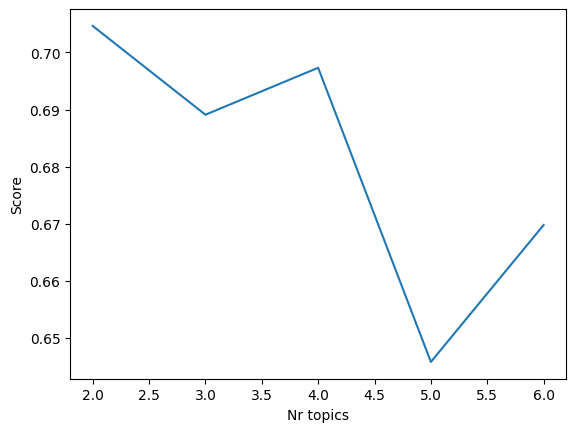

In [149]:
x = range(2, max_models+2)
plt.plot(x,coherence_scores)
plt.xlabel("Nr topics")
plt.ylabel("Score")
plt.show()

In [150]:
optimal_model = models[coherence_scores.index(max(coherence_scores))]
optimal_model.print_topics(num_words=10)

[(0,
  '0.003*"people" + 0.003*"covid" + 0.002*"texas" + 0.002*"time" + 0.002*"years" + 0.002*"coach" + 0.002*"day" + 0.002*"year" + 0.002*"week" + 0.001*"latest"'),
 (1,
  '0.004*"people" + 0.003*"covid" + 0.003*"news" + 0.002*"latest" + 0.002*"including" + 0.002*"coronavirus" + 0.002*"china" + 0.002*"day" + 0.002*"president" + 0.002*"government"')]

In [151]:
import pyLDAvis.gensim

lda_visualization = pyLDAvis.gensim.prepare(optimal_model, gensim_corpus, gensim_dictionary, sort_topics=False)
pyLDAvis.display(lda_visualization)


# 8. Sentiment analysis

### We would also want to classify the sentiment of the article as positive or negative or neutral. To do this i chose to use [vader](https://www.nltk.org/_modules/nltk/sentiment/vader.html), it's combining positive, negative and neutral values to obtain the overall sentiment of the text.

### There are other methods to do sentiment analysis with better results, for now vader should be enough for this part. 

In [152]:
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
analyser = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\God\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [153]:
from nltk.tokenize.treebank import TreebankWordDetokenizer
def analyse(tokens):
    sentence = TreebankWordDetokenizer().detokenize(tokens)
    score = analyser.polarity_scores(sentence)
    return score

results = []
for i in range(0,len(news)):
    try:
        score = analyse(news["tokens"][i])
        score['headline'] = news['title'][i]
        results.append(score)
    except: 
        continue

sentiment_df = pd.DataFrame.from_records(results)
sentiment_df['label'] = 0
sentiment_df.loc[sentiment_df['compound'] > 0, 'label'] =1
sentiment_df.loc[sentiment_df['compound'] < 0, 'label'] = -1

sentiment_df

,neg,neu,pos,compound,headline,label
0,0.000,0.574,0.426,0.6369,SA Chief Public Health Officer Nicola Spurrier...,1
1,0.171,0.829,0.000,-0.4767,Vietnam's Ho Chi Minh City to test entire popu...,-1
2,0.000,0.769,0.231,0.6597,Mandatory COVID-19 vaccination of aged care wo...,1
3,0.000,1.000,0.000,0.0000,NT introduces 'day 17 test' for COVID to preve...,0
4,0.000,1.000,0.000,0.0000,Queensland MPs to receive three pay rises in n...,0
...,...,...,...,...,...,...
397,0.000,1.000,0.000,0.0000,Destroying 'Black Wall Street': An illustrated...,0
398,0.160,0.491,0.350,0.4767,Vaccines 2.0: Next generation COVID shots will...,1
399,0.000,0.916,0.084,0.0258,Human remains found after plane crashes into T...,1
400,0.000,0.812,0.188,0.4588,"Memorial Day sales 2021: Home Depot, Lowe's, T...",1


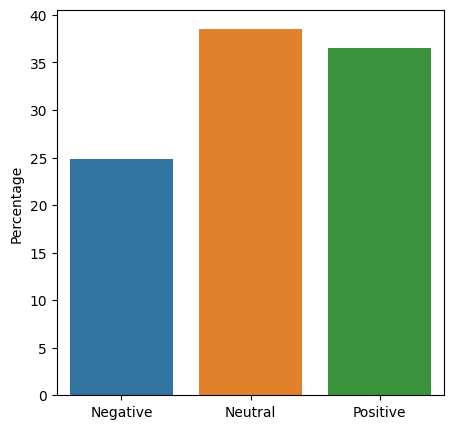

In [154]:
fig, ax = plt.subplots(figsize=(5, 5))
count = sentiment_df.label.value_counts(normalize=True) * 100

sns.barplot(x=count.index, y=count, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")
plt.show()

# 9. Conclusions

## The analysis provides the reader relevant information about the breaking news in the world. We could also select local news sources based on our interests to recieve information as fast and as accurate as possible.
## Providing this analysis we've went through most of the algorithms and techniques studied during the laboratory classes, tf-idf to see most used terms in the news today, the relationships between the words using ngrams, topic modelling to try and discover the main topics of the news and we finished with sentiment analysis to determine if today's news are positive or negative

# 10. Bibliography
    
## [News API](https://newsapi.org)
## [Radimrehurek](https://radimrehurek.com/)
## [NLTK](https://nltk.org)
## [Scikit-learn](https://scikit-learn.org/stable/)
## [Vader](pypi.org/project/vaderSentiment/)
 